In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
image= cv2.imread('obala.jpg')
image.shape

(575, 1024, 3)

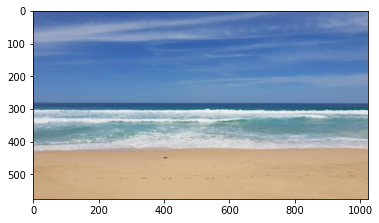

In [9]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [15]:
newimage = image[290:410,:]

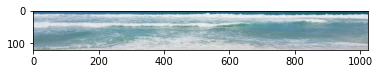

In [16]:
plt.imshow(cv2.cvtColor(newimage,cv2.COLOR_BGR2RGB))

In [17]:
newimageresized = cv2.resize(newimage,(256,128),interpolation = cv2.INTER_CUBIC)

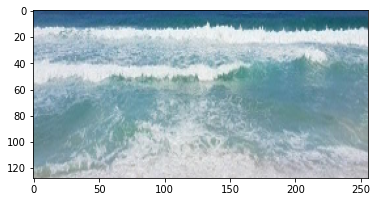

In [18]:
plt.imshow(cv2.cvtColor(newimageresized, cv2.COLOR_BGR2RGB))

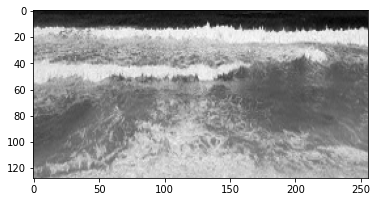

In [20]:
grayimage= cv2.cvtColor(newimageresized,cv2.COLOR_BGR2GRAY)
plt.imshow(grayimage,cmap='gray')

In [21]:
snp= np.zeros((grayimage.shape[0],grayimage.shape[1]))
cv2.randu(snp,0,255)

array([[135.2221123 ,  50.8110961 , 102.27015798, ...,  89.19890613,
         16.72883282,   3.16943371],
       [194.03644899, 216.43943801, 215.41942129, ...,  27.96149446,
         80.28561876, 192.4841607 ],
       [  1.50947929, 197.9823833 , 205.29855149, ..., 194.81040545,
         80.77256742, 155.75782559],
       ...,
       [176.33080434,  13.09483176, 203.02500834, ...,  67.26176992,
        104.09287885, 249.73044537],
       [111.37769552, 127.42966262,  64.18273752, ..., 138.99824883,
        177.19726739, 124.48761808],
       [ 52.38714007, 213.18815818, 123.38216324, ..., 203.53519699,
        140.37931202, 119.56155789]])

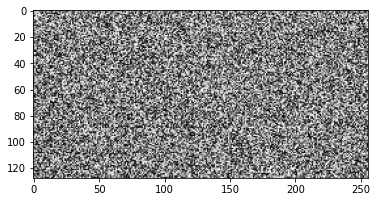

In [22]:
plt.imshow(snp,cmap='gray')

In [30]:
import scipy as sp
from scipy import signal

In [25]:
Gs= signal.lti ([1,0,4],[1,4,2])

In [26]:
t1= np.linspace(0,500,10000)
t11, u11 = Gs.step(T=t1)

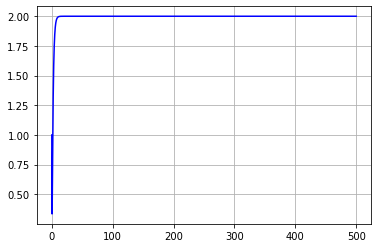

In [28]:
plt.plot(t11, u11, 'b')
plt.grid()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.absolute is deprecated and will be removed in SciPy 2.0.0, use numpy.absolute instead
  


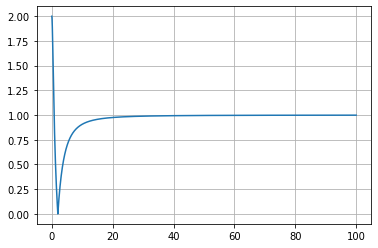

In [31]:
w, Gjw = Gs.freqresp(n=10000)
plt.plot(w,sp.absolute(Gjw))
plt.grid()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.arctan is deprecated and will be removed in SciPy 2.0.0, use numpy.arctan instead
  """Entry point for launching an IPython kernel.


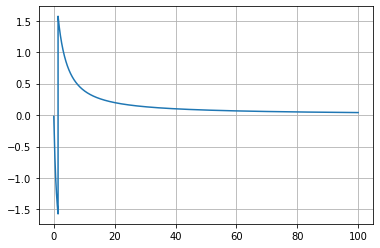

In [32]:
plt.plot(w,sp.arctan(Gjw.imag/Gjw.real))
plt.grid()

In [33]:
jw= Gs.poles.imag
sig= Gs.poles.real
zeros= Gs.zeros

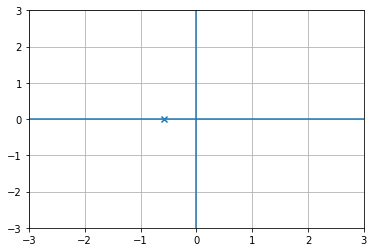

In [34]:
plt.scatter(sig,jw, marker= 'x')
plt.xlim(-3,3)
plt.ylim(-3,3)

plt.axvline(x=0)
plt.axhline(y=0)

plt.grid()
plt.show()

FINAL


In [35]:
image_float32 = np.float32(grayimage)

In [36]:
dft= cv2.dft(image_float32, flags= cv2.DFT_COMPLEX_OUTPUT)

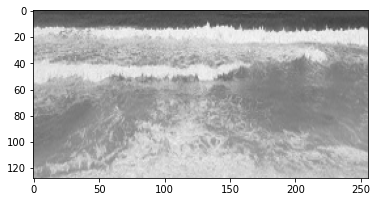

In [37]:
ffd =cv2.goodFeaturesToTrack(image_float32,100, 0.2, 10)
ffd = np.int0(ffd)

for i in ffd:
  x,y = i.ravel()
  cv2.circle(image_float32, (x,y),2,255,-1)
plt.imshow(cv2.cvtColor(grayimage, cv2.COLOR_BGR2RGB))

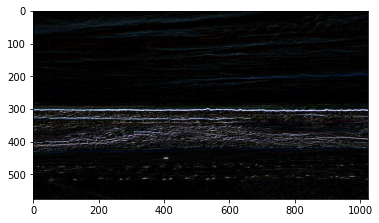

In [38]:
X= cv2.Sobel(image,cv2.CV_8UC1, 1, 0)
Y= cv2.Sobel (image, cv2.CV_8UC1, 0, 1)

sobel = cv2.add(X,Y)

plt.imshow(sobel, cmap='gray')